##Importação de Bibliotecas

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

##Carregar o Dataset e Visualização Inicial

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

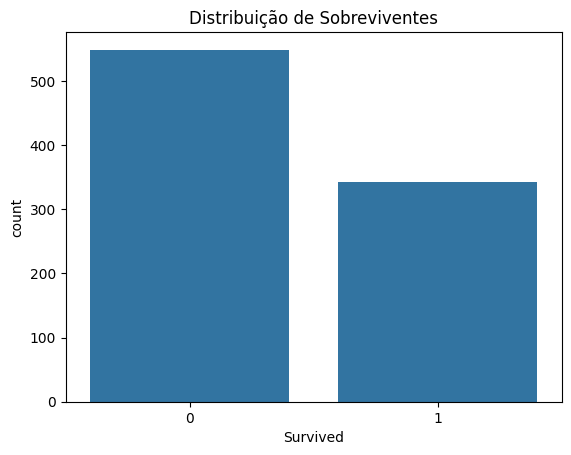

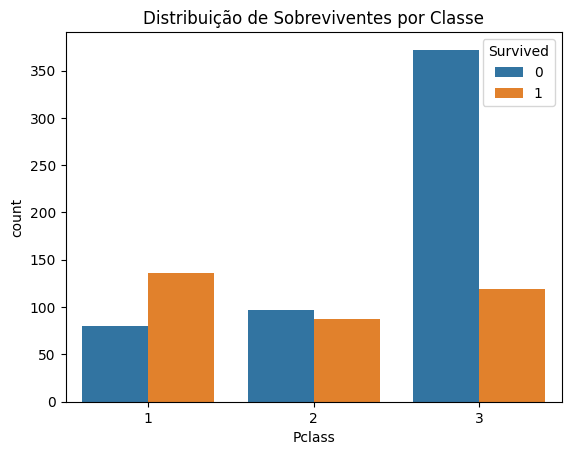

In [48]:
# Carregar o dataset Titanic
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic.csv')

# Visualizar as primeiras linhas do dataset
print(df.head())

# Análise Exploratória
print(df.info())
print(df.isnull().sum())  # Verificando valores ausentes

# Visualização das distribuições
sns.countplot(x='Survived', data=df)
plt.title("Distribuição de Sobreviventes")
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Distribuição de Sobreviventes por Classe")
plt.show()

##Pré-processamento dos Dados

In [49]:
# Pré-processamento dos Dados
# Preenchendo valores ausentes
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop da coluna 'Cabin' devido ao grande número de valores ausentes
df.drop(columns=['Cabin'], inplace=True)

# Transformando variáveis categóricas em numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Verificando o dataset após o pré-processamento
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB
None


##Seleção de Features e Divisão dos Dados

In [50]:
# Seleção de Features
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Dividindo o dataset em dados de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Padronização dos Dados

In [51]:
# Padronização das Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Definição dos Modelos

In [52]:
# Modelos
# 1. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# 2. Logistic Regression
logreg = LogisticRegression(random_state=42)

# 3. Support Vector Machine (SVM)
svm = SVC(random_state=42)

##Definição dos Parâmetros e GridSearchCV

In [53]:
# Definindo os parâmetros para GridSearch
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearch para Random Forest
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# GridSearch para Logistic Regression
grid_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_logreg.fit(X_train, y_train)

# GridSearch para SVM
grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Melhores hiperparâmetros
print(f"Melhores hiperparâmetros (Random Forest): {grid_rf.best_params_}")
print(f"Melhores hiperparâmetros (Logistic Regression): {grid_logreg.best_params_}")
print(f"Melhores hiperparâmetros (SVM): {grid_svm.best_params_}")

Melhores hiperparâmetros (Random Forest): {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Melhores hiperparâmetros (Logistic Regression): {'C': 0.01, 'solver': 'saga'}
Melhores hiperparâmetros (SVM): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


##Avaliação dos Modelos

In [54]:
# Avaliação dos Modelos
# 1. Random Forest
best_rf = grid_rf.best_estimator_
rf_pred = best_rf.predict(X_test)
print(f"Random Forest - Acurácia: {accuracy_score(y_test, rf_pred)}")
print(f"Random Forest - Relatório de Classificação:\n{classification_report(y_test, rf_pred)}")
print(f"Random Forest - Matriz de Confusão:\n{confusion_matrix(y_test, rf_pred)}\n")

# 2. Logistic Regression
best_logreg = grid_logreg.best_estimator_
logreg_pred = best_logreg.predict(X_test)
print(f"Logistic Regression - Acurácia: {accuracy_score(y_test, logreg_pred)}")
print(f"Logistic Regression - Relatório de Classificação:\n{classification_report(y_test, logreg_pred)}")
print(f"Logistic Regression - Matriz de Confusão:\n{confusion_matrix(y_test, logreg_pred)}\n")

# 3. SVM
best_svm = grid_svm.best_estimator_
svm_pred = best_svm.predict(X_test)
print(f"SVM - Acurácia: {accuracy_score(y_test, svm_pred)}")
print(f"SVM - Relatório de Classificação:\n{classification_report(y_test, svm_pred)}")
print(f"SVM - Matriz de Confusão:\n{confusion_matrix(y_test, svm_pred)}\n")


Random Forest - Acurácia: 0.8324022346368715
Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Random Forest - Matriz de Confusão:
[[95 10]
 [20 54]]

Logistic Regression - Acurácia: 0.7932960893854749
Logistic Regression - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Logistic Regression - Matriz de Confusão:
[[92 13]
 [24 50]]

SVM - Acurácia: 0.8212290502793296
SVM

##Salvando o Melhor Modelo

In [55]:
# Salvando o melhor modelo (Random Forest, Logistic Regression ou SVM)
best_model = best_rf  # Se preferir usar outro, substitua aqui.
joblib.dump(best_model, 'melhor_modelo_titanic.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [56]:
# Carregar o modelo salvo
model_loaded = joblib.load('melhor_modelo_titanic.pkl')

# Fazendo previsões com o modelo carregado
sample_data = X_test[0:5]  # Exemplo com as primeiras 5 instâncias de X_test
predictions = model_loaded.predict(sample_data)
print("Previsões para os 5 primeiros exemplos:", predictions)


Previsões para os 5 primeiros exemplos: [0 0 0 1 0]


##Gráficos

##Gráfico de comparação de acurácia

<ipython-input-57-b452375cf8d1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


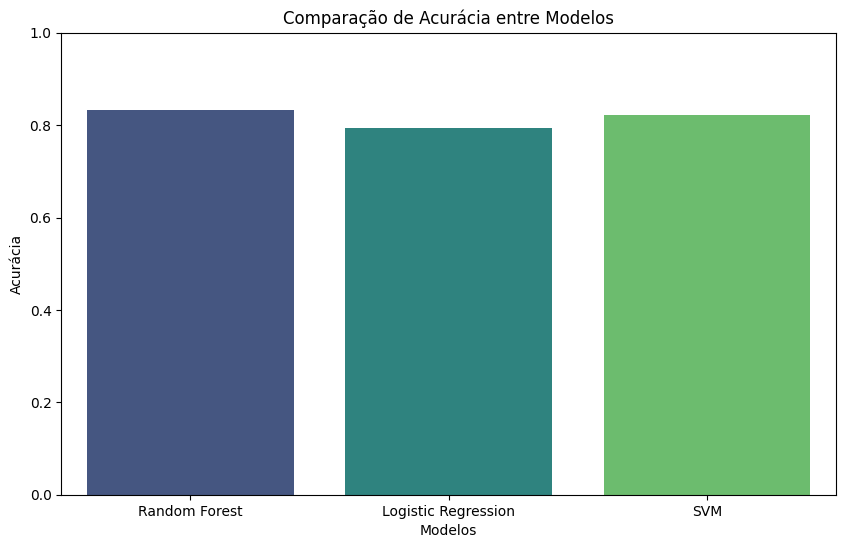

In [57]:
models = ['Random Forest', 'Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, logreg_pred),
    accuracy_score(y_test, svm_pred)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Comparação de Acurácia entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
plt.show()

## Matrizes de Confusão

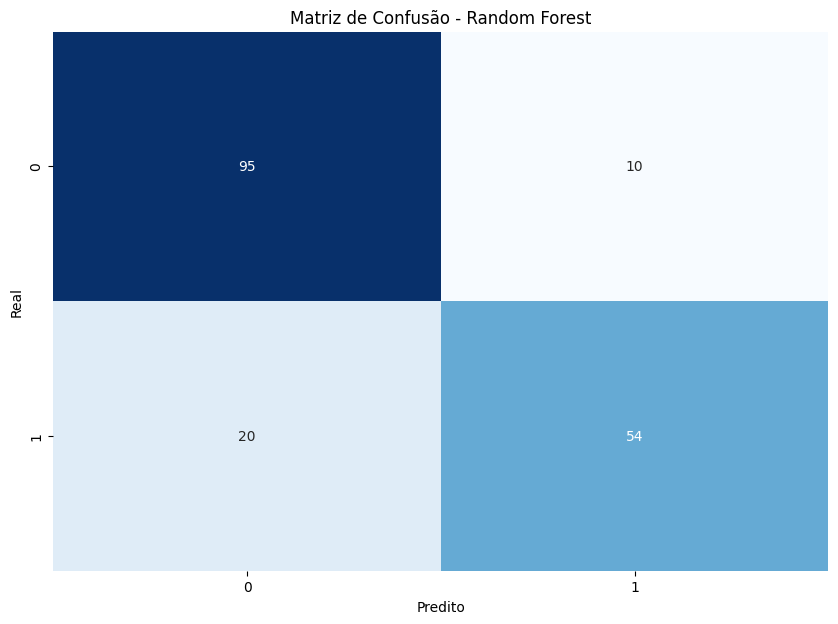

In [58]:

# Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

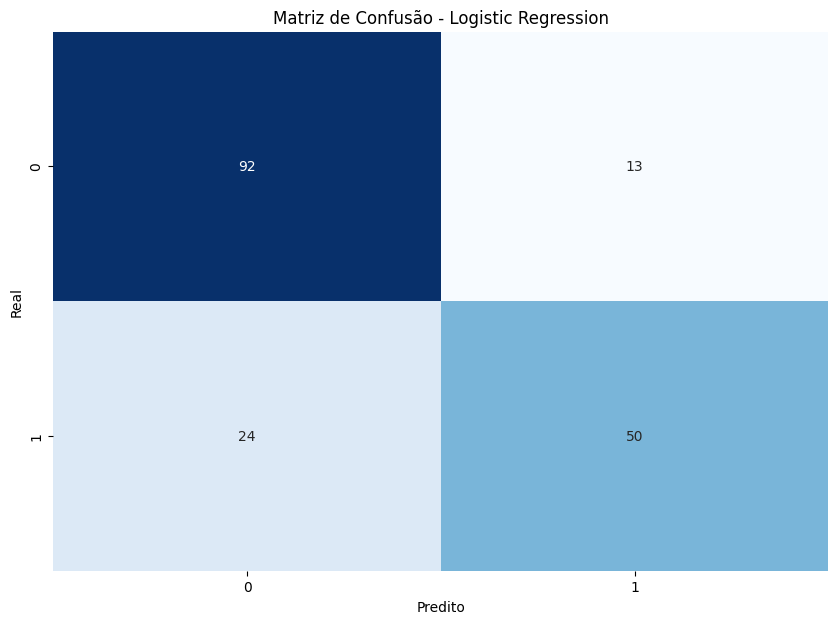

In [59]:
# Logistic Regression
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, logreg_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Logistic Regression')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

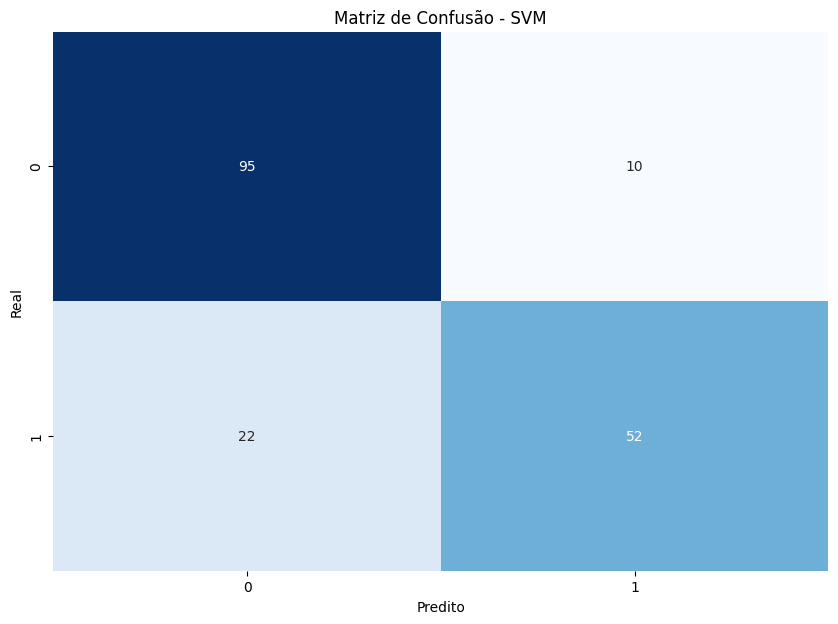

In [60]:
# SVM
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - SVM')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

##Importância das Features (Random Forest)

<ipython-input-61-181f8e66d383>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


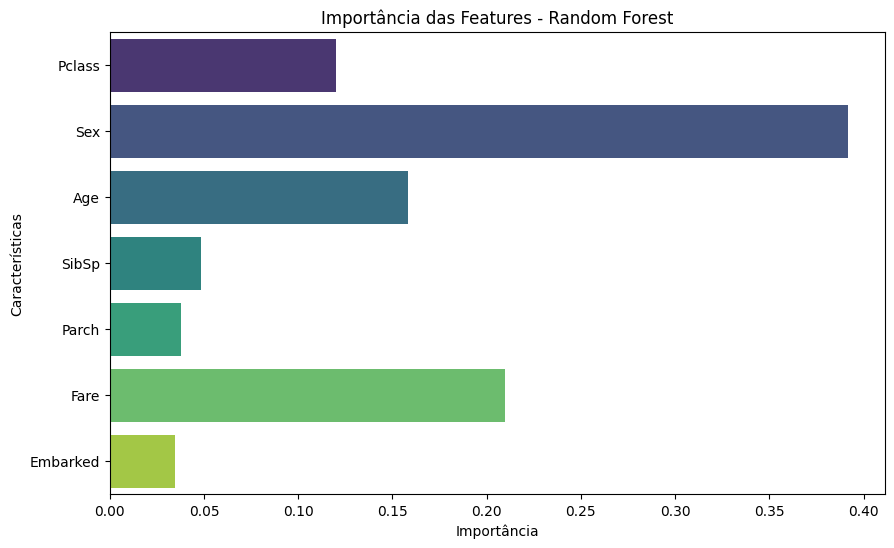

In [61]:
# Gráfico de Importância das Features para Random Forest
feature_importances = best_rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.title('Importância das Features - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.show()

## Matriz de Confusão Normalizada

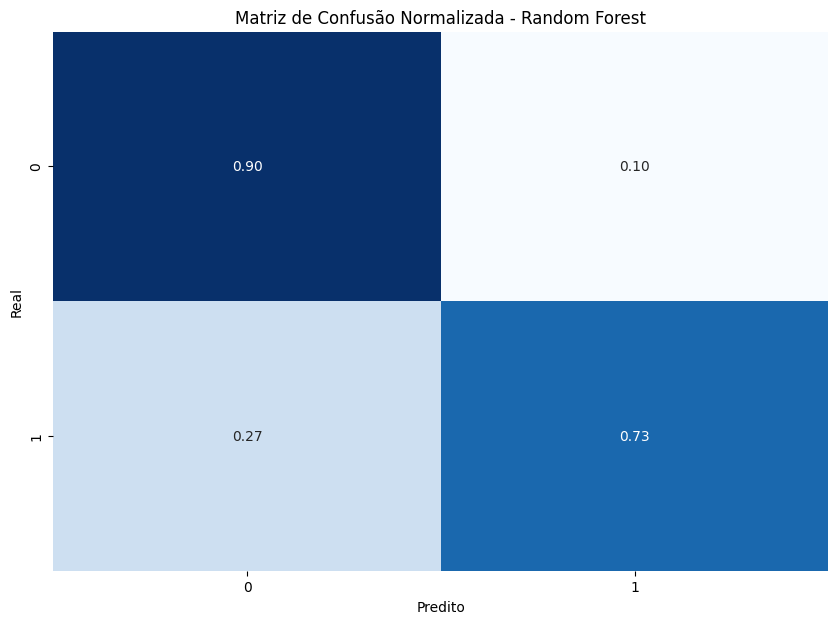

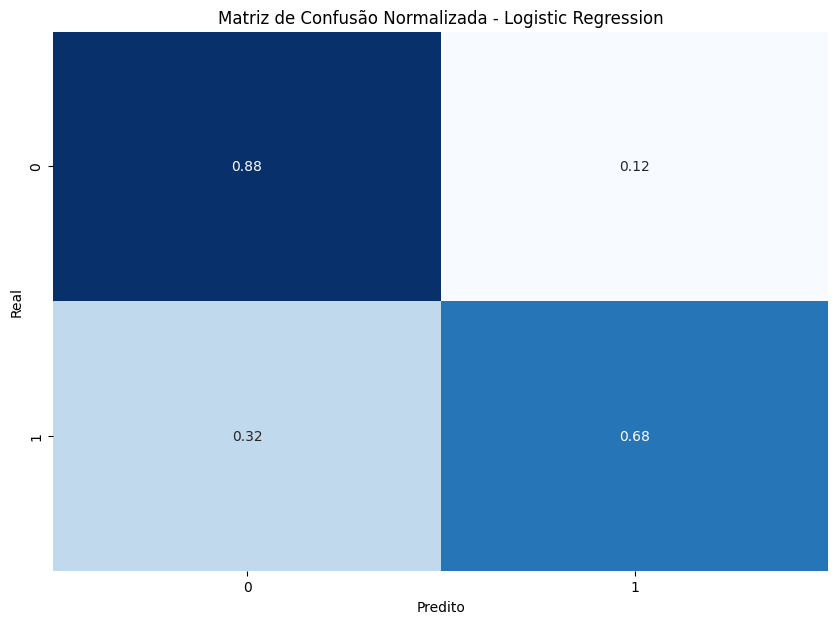

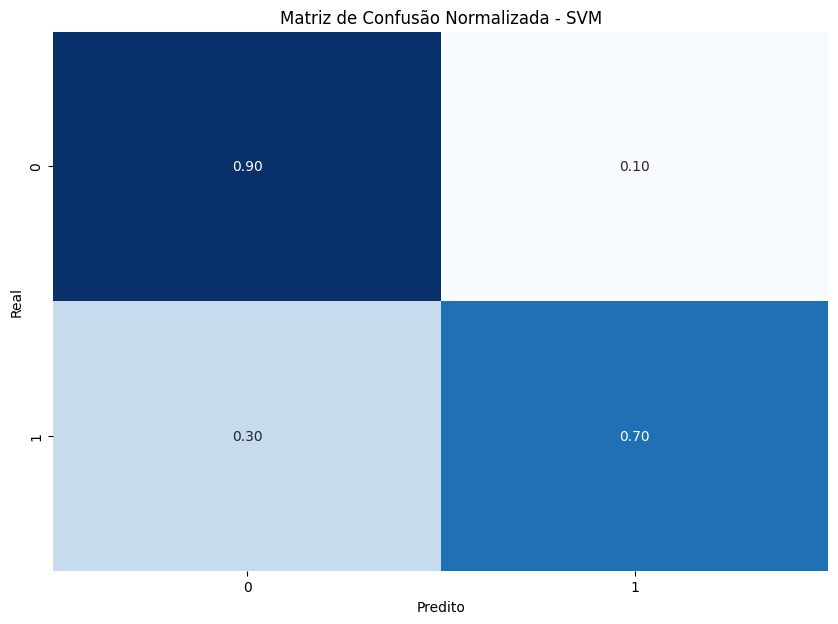

In [62]:
# Função para gerar matriz de confusão normalizada
def plot_normalized_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalizando
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão Normalizada - {model_name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

# Matriz de Confusão Normalizada para Random Forest
plot_normalized_confusion_matrix(y_test, rf_pred, "Random Forest")

# Matriz de Confusão Normalizada para Logistic Regression
plot_normalized_confusion_matrix(y_test, logreg_pred, "Logistic Regression")

# Matriz de Confusão Normalizada para SVM
plot_normalized_confusion_matrix(y_test, svm_pred, "SVM")